# Dataset

In [1]:
import pandas as pd

dataset_df = pd.read_csv('data/csv/All.csv', encoding='utf-8', dtype=str, low_memory=False)

In [2]:
dataset_df

,PTTp,PTTf,PTTd,HeartRate,SBP,DBP,AI,LASI,S1,S2,S3,S4
0,0.0883809523809524,0.44000000000000006,2.6733333333333333,125.12695097297141,130.43329604900043,64.68913169835835,0.9922470519252067,2.392,11.784402737047898,4.340562267839687,2.131208602150538,18.303930400782015
1,0.07000000000000002,0.41515789473684217,1.672,123.96177910670554,157.72738151641408,64.38629825186952,0.9177047289504034,3.84,6.033327859237537,7.44174467253177,5.302010557184752,18.826870772238514
2,0.07847619047619048,0.44320000000000004,0.504,121.96242854624663,140.10442869493437,50.98347603952466,0.989021633839199,1.48,3.8016195503421315,2.742877028347996,11.476136070381234,18.06877732160313
3,0.05676190476190477,0.3928000000000001,3.544,129.59047971954195,138.06274513634833,55.58459066198415,0.9848300582474556,0.48,13.149560899315741,0.9034979472140763,4.079298533724341,18.179439296187688
4,0.0712,0.4374736842105264,3.2440000000000007,121.84646571478936,132.6019742786947,55.93626821274539,0.9975117862755369,1.488,6.727907722385142,2.710827761485826,8.864481720430108,18.350898142717497
...,...,...,...,...,...,...,...,...,...,...,...,...
4940,0.5011428571428571,0.3822857142857144,2.518857142857143,90.13468008419939,168.8285046099021,97.14496720610043,0.9449321628092577,4.008,8.27980136852395,7.3020715542522,2.2052527859237534,17.840430889540567
4941,0.3381333333333334,0.2661333333333333,4.872571428571429,90.51399808433051,138.18569728798263,78.64674610664025,0.894874694922317,0.504,16.8972715542522,1.0228183773216033,0.8687593352883677,18.837203519061585
4942,0.5068571428571428,0.41599999999999987,1.0426666666666666,90.51821592016374,178.1948408953702,78.07234000152394,0.9983107051241943,2.824,6.2422357771260994,4.815519843597263,7.001963636363637,18.109645356793745
4943,0.29947826086956525,0.20973913043478265,3.3327999999999998,155.74575797668763,113.00553565632205,56.17062845987654,0.997623177233892,7.712,3.030912218963832,15.89653567937439,1.3085294232649072,20.284596676441836


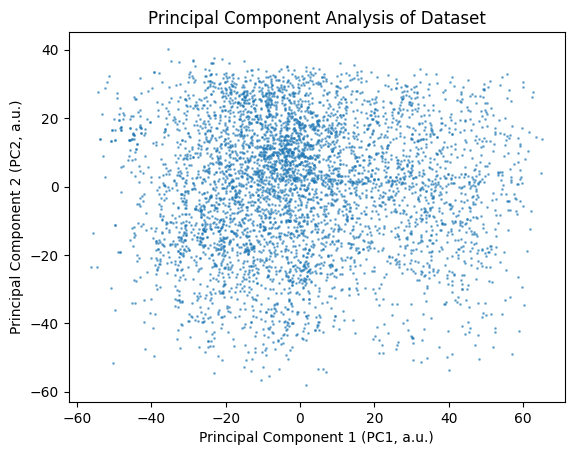

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as PCA_sklearn

dataset_initial_PCA = PCA_sklearn(n_components=2)
PC1, PC2 = dataset_initial_PCA.fit_transform(dataset_df).T

plt.scatter(PC1, PC2, s=1, alpha=0.5)
plt.xlabel('Principal Component 1 (PC1, a.u.)')
plt.ylabel('Principal Component 2 (PC2, a.u.)')
plt.title('Principal Component Analysis of Dataset')
plt.savefig('figures/PCA_initial.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [4]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

dbp = dataset_df[['DBP']].astype(np.float32)
sbp = dataset_df[['SBP']].astype(np.float32)
X = dataset_df.drop(columns=['DBP', 'SBP']).astype(np.float32)

X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

sbp_scaler = StandardScaler()
sbp_scaled = pd.DataFrame(sbp_scaler.fit_transform(sbp))

dbp_scaler = StandardScaler()
dbp_scaled = pd.DataFrame(dbp_scaler.fit_transform(dbp))

dbp = dbp['DBP']
sbp = sbp['SBP']

K_FOLDS = 5
kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

In [5]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_regression(y_true, y_pred, label="Model", plot=True):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    results_df = pd.DataFrame({
        'Model': [label],
        'R^2': [r2],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae]
    })
    print(results_df)

    if plot:
        plt.figure(figsize=(5, 5))
        plt.scatter(y_true, y_pred, alpha=0.5, label=label)
        min_val = min(y_true.min(), y_pred.min())
        max_val = max(y_true.max(), y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
        plt.xlabel("True Values")
        plt.ylabel("Predicted Values")
        plt.title(f"{label} for Calibration Curve")
        plt.legend()
        plt.show()

        errors = y_true - y_pred
        plt.figure(figsize=(6, 5))
        plt.hist(errors, bins=min(round(max(errors) - min(errors)), 40), edgecolor='black', alpha=0.7)
        plt.xlabel("Error (True - Predicted)")
        plt.ylabel("Frequency")
        plt.title(f"Error Distribution for {label}")
        plt.show()
    return r2, mse, rmse, mae

# Evaluation against Measurement Standards

In [ ]:
import numpy as np

def evaluate_bhs(differences_mmHg):
    differences_mmHg = np.abs(differences_mmHg)
    n = len(differences_mmHg)
    pct_5 = np.sum(differences_mmHg <= 5) / n * 100
    pct_10 = np.sum(differences_mmHg <= 10) / n * 100
    pct_15 = np.sum(differences_mmHg <= 15) / n * 100

    # Assign grade
    if pct_5 >= 60 and pct_10 >= 85 and pct_15 >= 95:
        grade = 'A'
    elif pct_5 >= 50 and pct_10 >= 75 and pct_15 >= 90:
        grade = 'B'
    elif pct_5 >= 40 and pct_10 >= 65 and pct_15 >= 85:
        grade = 'C'
    else:
        grade = 'D'

    return {
        'grade': grade,
        'percent_within_5mmHg': pct_5,
        'percent_within_10mmHg': pct_10,
        'percent_within_15mmHg': pct_15
    }

def evaluate_aami(differences_mmHg):
    differences_mmHg = np.array(differences_mmHg)
    mean_error = np.mean(differences_mmHg)
    std_dev = np.std(differences_mmHg, ddof=1)  # Sample std dev

    pass_fail = 'Pass' if abs(mean_error) <= 5 and std_dev <= 8 else 'Fail'

    return {
        'pass_fail': pass_fail,
        'mean_error_mmHg': mean_error,
        'std_dev_mmHg': std_dev
    }


# K-Fold Cross Validation Setup
All models below are evaluated using k-fold cross validation (k=5).

In [ ]:
def cross_val_regression(model_cls, X, y, label, model_kwargs=None, scale_X=False, scale_y=False, y_scaler=None, plot=True):
    metrics = []
    bhs_results = []
    aami_results = []
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        if scale_X:
            X_scaler = StandardScaler()
            X_train = X_scaler.fit_transform(X[train_idx])
            X_test = X_scaler.transform(X[test_idx])
        else:
            X_train = X[train_idx]
            X_test = X[test_idx]
        if scale_y and y_scaler is not None:
            y_train = y_scaler.fit_transform(y[train_idx].reshape(-1, 1)).flatten()
            y_test = y_scaler.transform(y[test_idx].reshape(-1, 1)).flatten()
        else:
            y_train = y[train_idx]
            y_test = y[test_idx]
        model = model_cls(**(model_kwargs or {}))
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        if scale_y and y_scaler is not None:
            # Inverse transform predictions for reporting
            y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
            y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
        # Only plot for the first fold
        r2, mse, rmse, mae = evaluate_regression(y_test, y_pred, label=f"{label} (Fold {fold+1})", plot=(plot and fold==0))
        metrics.append([r2, mse, rmse, mae])
        
        # Evaluate against standards
        differences = y_test - y_pred
        bhs_results.append(evaluate_bhs(differences))
        aami_results.append(evaluate_aami(differences))
    
    metrics = np.array(metrics)
    print(f"\n{label} Mean ± Std over {K_FOLDS} folds:")
    print(f"R^2: {metrics[:,0].mean():.4f} ± {metrics[:,0].std():.4f}")
    print(f"MSE: {metrics[:,1].mean():.4f} ± {metrics[:,1].std():.4f}")
    print(f"RMSE: {metrics[:,2].mean():.4f} ± {metrics[:,2].std():.4f}")
    print(f"MAE: {metrics[:,3].mean():.4f} ± {metrics[:,3].std():.4f}")
    
    # Aggregate BHS results
    avg_bhs = {
        'grade': max(set([res['grade'] for res in bhs_results]), key=[res['grade'] for res in bhs_results].count),
        'percent_within_5mmHg': np.mean([res['percent_within_5mmHg'] for res in bhs_results]),
        'percent_within_10mmHg': np.mean([res['percent_within_10mmHg'] for res in bhs_results]),
        'percent_within_15mmHg': np.mean([res['percent_within_15mmHg'] for res in bhs_results])
    }
    print(f"\n{label} BHS Evaluation (Mean over {K_FOLDS} folds):")
    print(f"Grade: {avg_bhs['grade']}")
    print(f"Percent within 5 mmHg: {avg_bhs['percent_within_5mmHg']:.3e}%")
    print(f"Percent within 10 mmHg: {avg_bhs['percent_within_10mmHg']:.3e}%")
    print(f"Percent within 15 mmHg: {avg_bhs['percent_within_15mmHg']:.3e}%")
    
    # Aggregate AAMI results
    avg_aami = {
        'mean_error_mmHg': np.mean([res['mean_error_mmHg'] for res in aami_results]),
        'std_dev_mmHg': np.mean([res['std_dev_mmHg'] for res in aami_results]),
        'pass_fail': 'Pass' if all(res['pass_fail'] == 'Pass' for res in aami_results) else 'Fail'
    }
    print(f"\n{label} AAMI Evaluation (Mean over {K_FOLDS} folds):")
    print(f"Mean Error (mmHg): {avg_aami['mean_error_mmHg']:.3e}")
    print(f"Standard Deviation (mmHg): {avg_aami['std_dev_mmHg']:.2f}")
    print(f"Pass/Fail: {avg_aami['pass_fail']}")

# Testing Various Models

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# DBP
cross_val_regression(LinearRegression, X.values, dbp.values, label="Linear Regression DBP", plot=True)

In [ ]:
# SBP
cross_val_regression(LinearRegression, X.values, sbp.values, label="Linear Regression SBP", plot=True)

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# DBP
cross_val_regression(RandomForestRegressor, X.values, dbp.values, label="Random Forest DBP", model_kwargs={'n_estimators':100, 'random_state':42})

In [ ]:
# SBP
cross_val_regression(RandomForestRegressor, X.values, sbp.values, label="Random Forest SBP", model_kwargs={'n_estimators':100, 'random_state':42})

## XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

# DBP
cross_val_regression(XGBRegressor, X.values, dbp.values, label="XGBoost DBP", model_kwargs={'random_state':42})

In [ ]:
# SBP
cross_val_regression(XGBRegressor, X.values, sbp.values, label="XGBoost SBP", model_kwargs={'random_state':42})

## Support Vector Machine

In [ ]:
from sklearn.svm import SVR

# DBP
cross_val_regression(SVR, X.values, dbp.values, label="SVM DBP", model_kwargs={'kernel':'rbf'})

In [ ]:
# SBP
cross_val_regression(SVR, X.values, sbp.values, label="SVM SBP", model_kwargs={'kernel':'rbf'})

## CatBoost

In [ ]:
from catboost import CatBoostRegressor

# DBP
cross_val_regression(CatBoostRegressor, X.values, dbp.values, label="CatBoost DBP", model_kwargs={'random_state':42, 'verbose':0})

In [ ]:
# SBP
cross_val_regression(CatBoostRegressor, X.values, sbp.values, label="CatBoost SBP", model_kwargs={'random_state':42, 'verbose':0})

## Multilayer Perceptron Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

MLP_HIDDEN_LAYER_SIZES = (64, 64, 32, 16)
MLP_MAX_ITER = 500

# DBP
cross_val_regression(MLPRegressor, X.values, dbp.values, label="MLP DBP", model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42})

In [ ]:
# SBP
cross_val_regression(MLPRegressor, X.values, sbp.values, label="MLP SBP", model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42})

### Multilayer Perceptron w/ Scaled X and Y

In [ ]:
# DBP
cross_val_regression(
    MLPRegressor, X_scaled, dbp.values, label="MLP DBP (Scaled X & Y)",
    model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42},
    scale_X=False, scale_y=True, y_scaler=dbp_scaler
)

In [ ]:
# SBP
cross_val_regression(
    MLPRegressor, X_scaled, sbp.values, label="MLP SBP (Scaled X & Y)",
    model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42},
    scale_X=False, scale_y=True, y_scaler=sbp_scaler
)

# Causal Analysis

## Direct LINGAM

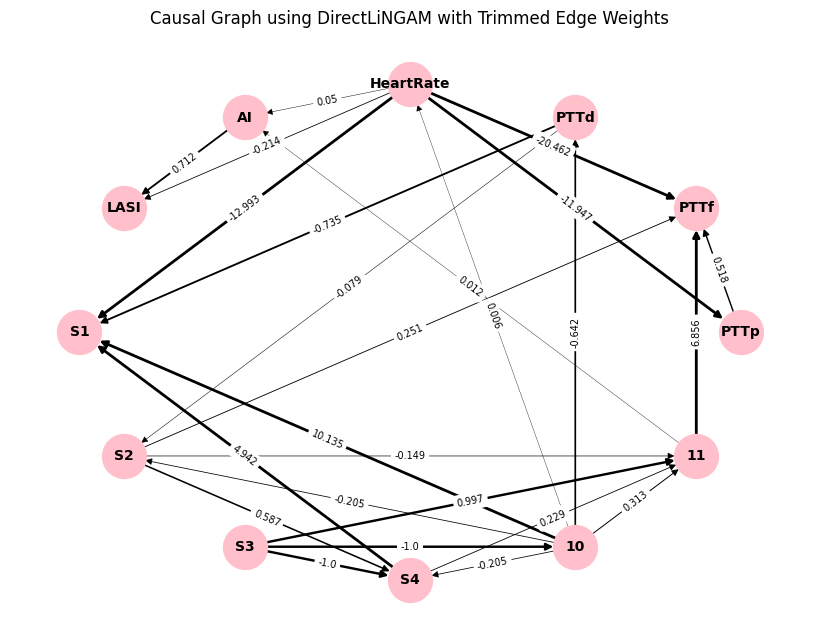

In [ ]:
from lingam import DirectLiNGAM
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

EDGE_THRESHOLD = 0.005

# Fit the DirectLiNGAM model
model = DirectLiNGAM()
model.fit(dataset_df)

# Get the adjacency matrix
adjacency_matrix = model.adjacency_matrix_

# Create a directed graph using NetworkX
causal_graph = nx.DiGraph(adjacency_matrix)

# Relabel nodes with feature names
causal_graph = nx.relabel_nodes(causal_graph, {i: col for i, col in enumerate(X.columns)})

# Remove edges with weights less than 0.005
edges_to_remove = [(u, v) for u, v, d in causal_graph.edges(data=True) if abs(d['weight']) < EDGE_THRESHOLD]
causal_graph.remove_edges_from(edges_to_remove)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.circular_layout(causal_graph)
edge_weights = [min(abs(weight) * 1.5 + 0.25, 2) for weight in nx.get_edge_attributes(causal_graph, 'weight').values()]
nx.draw(
    causal_graph, pos, with_labels=True, node_size=1000, node_color="pink",
    font_size=10, font_weight="bold", edge_color="black", width=edge_weights
)

# Add edge weights as labels
edge_labels = {edge: round(weight, 3) for edge, weight in nx.get_edge_attributes(causal_graph, 'weight').items()}
nx.draw_networkx_edge_labels(causal_graph, pos, edge_labels=edge_labels, font_size=7, )

plt.title("Causal Graph using DirectLiNGAM with Trimmed Edge Weights")
plt.savefig('figures/causal_graph_direct_lingam.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()